# Preprocessing Images with Tensorflow's Image Generator
![flow](../figs/TFImageGenerator.png)

# 1) Get Filepath

In [2]:
import tensorflow as tf

# 1) Get filepath
filepath = tf.keras.utils.get_file('flower_photos', 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', untar=True)
filepath

'/Users/ness/.keras/datasets/flower_photos'

# 2) Create image Generator

In [6]:
image_generator_kwargs = dict(rescale=1./255,
                         validation_split=0.20)
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(**image_generator_kwargs)


# 3) Connect to data source for training data

In [9]:
#Utility function to explore datasets
def print_dataset(dataset):
    for item in dataset:
        print(item)

# Some constants for the datasource
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
INTERPOLATION = 'bilinear'

# Parameters for the training data source
train_flow_kwargs = dict(target_size=IMAGE_SIZE,
                        batch_size=BATCH_SIZE, 
                        interpolation = INTERPOLATION,
                        subset='training', 
                        shuffle = True)

# Parameters for the validation data source
validation_flow_kwargs = dict(target_size=IMAGE_SIZE,
                        batch_size=BATCH_SIZE, 
                        interpolation = INTERPOLATION,
                        subset='validation', 
                        shuffle = False)

# Create the training datasource 
train_data_flow = image_generator.flow_from_directory(filepath, **train_flow_kwargs)

# Create the validation datasource
validation_data_flow = image_generator.flow_from_directory(filepath, **validation_flow_kwargs)

print(type(train_data_flow))
print(type(validation_data_flow))

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.
<class 'keras.preprocessing.image.DirectoryIterator'>
<class 'keras.preprocessing.image.DirectoryIterator'>


# Extract class labels to create a dictionary


In [11]:
# examine the class labels
class_labels = train_data_flow.class_indices
print(class_labels)

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


In [19]:
# to create a prediction output it is more useful to have keys as numbers and classes as values
# invert this dictionary
idx_labels_dictionary = dict((value, key) for (key, value) in class_labels.items())
print(idx_labels_dictionary)

{0: 'daisy', 1: 'dandelion', 2: 'roses', 3: 'sunflowers', 4: 'tulips'}


# Explore the data source of training data
**Remember that the variable: ```train_data_flow```** is a generator and can respond to the ```next``` and ```iter``` methods

In [46]:
# Apparently the generator returns a tuple
item = next(train_data_flow)
print(type(item))
for object in item:
    print(f'shape: {object.shape} and type: {type(object)}')


<class 'tuple'>
shape: (32, 224, 224, 3) and type: <class 'numpy.ndarray'>
shape: (32, 5) and type: <class 'numpy.ndarray'>


In [38]:
#which we can iterate using the iter method
item_iterator = iter(item)
for (idx,element) in enumerate(item_iterator):
    print(f'idx:{idx}-->element shape: {element.shape} and type: {type(element)}')
    

idx:0-->element shape: (32, 224, 224, 3) and type: <class 'numpy.ndarray'>
idx:1-->element shape: (32, 5) and type: <class 'numpy.ndarray'>


### Analyze the data
We can identify to types of numpy arrays being returned first one represent the image information as given by our parameters a **Batch of size 32** with information of **224x224 and 3 dimensions for colors** and our label which is also a **32 size Batch**, with a hot encoder vector of size 5```([0,0,0,0,1])``` for each one of our classes

In [44]:
image_batch, label_batch = next(iter(train_data_flow))
#image_batch, label_batch = next((train_data_flow))
#print(type(image_batch), (image_batch.shape))
#print(type(label_batch), (label_batch.shape))

<class 'numpy.ndarray'> (32, 224, 224, 3)
<class 'numpy.ndarray'> (32, 5)


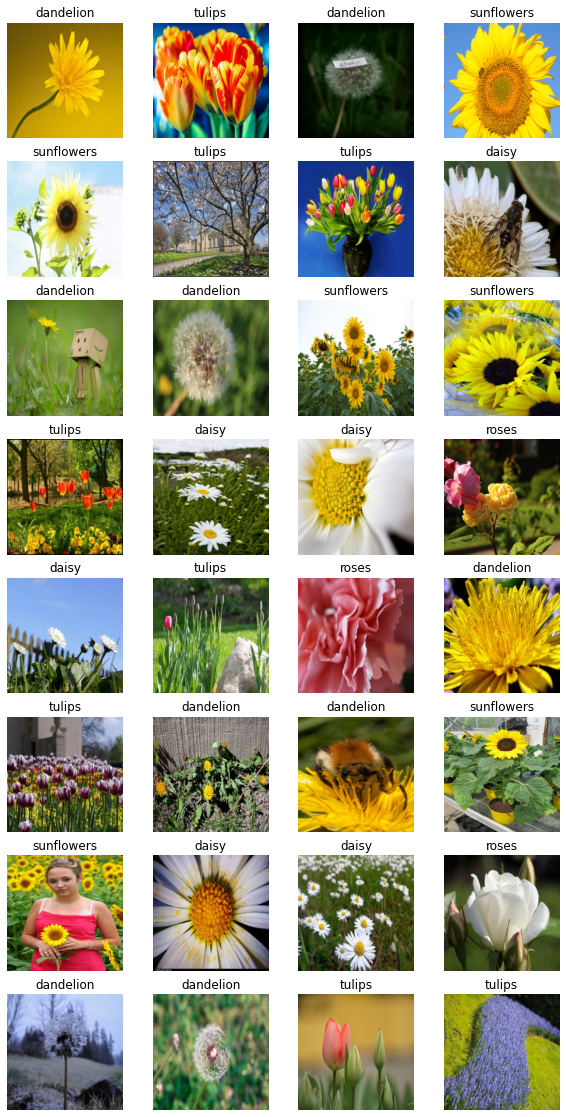

In [45]:
import matplotlib.pyplot as plt
import numpy as np
# plot data
fig, axes = plt.subplots(8, 4, figsize=(10, 20))
axes = axes.flatten()

for img, lbl, ax in zip(image_batch, label_batch, axes):
    ax.imshow(img)
    idx_of_lbl = np.argmax(lbl)
    label = idx_labels_dictionary[idx_of_lbl]
    ax.set_title(label)
    ax.axis('off')

plt.show()